## Lunch & Learn
### Understand Visualizations in Matplotlib and Seaborn

A huge tool in the data scientist workbench is that of custom visualizations. In Excel, PowerBI and Tableau you are often limited by the pre-defined constructs for visualization. Packages like matplotlib and seaborn, along with some practice & understanding allow you the flexibility to build what you want. 

Both matplotlib and seaborn packages are built on the conceptual layering of matplotlib. Now, what this means is that you build any graph, layer by layer, or line of code by line of code. You add the chart, the title, the trendlines, the size and other formatting, one line at a time...really letting you build exactly what you want. For more information on the packages, here are some links that explain the packages and show you cool thing about them.

* matplotlib
    * explain: https://matplotlib.org/
    * cool visualizations: https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/
* seaborn
    * explain: https://seaborn.pydata.org/introduction.html
    * cool visualizations: https://seaborn.pydata.org/examples/index.html
    
Now, given the above understanding, lets build a few visualizations and I can show you how we can customize and add complexity along the way.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### First, Ingest a dataset and then take a look

I have decided to read in the mtcars dataset from a the pydataset package (this package is great for getting datasets to learn, play and test your data science skills.


In [27]:
from pydataset import data

In [112]:
df = data('mtcars')

Below, we can see that we have an index of car types with each car's associated metrics.

Here is a link you can check out to understand the variables a bit more: https://stat.ethz.ch/R-manual/R-devel/library/datasets/html/mtcars.html

In [133]:
df.head(10)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


### Histogram

Take a univariate statistic and visualize in a distribution. So, for mt cars, lets check out the distribution of miles per gallon of all the cars. 

The chart below shows that most of the cars in our dataset get between 15 and 20 mpg

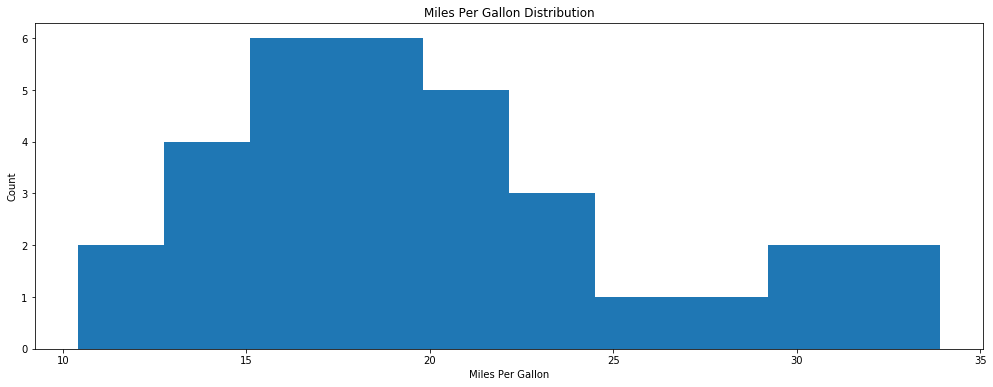

In [37]:
plt.figure(figsize=(17, 6)) # set print size
plt.hist(df.mpg, bins = 10)
plt.title("Miles Per Gallon Distribution")
plt.xlabel("Miles Per Gallon")
plt.ylabel("Count")
plt.show()

### Box and Whisker Plot with Seaborn + Beeswarm

Lets see how miles per gallon is distributed across the cylinders in a box and whisker chart, which highlights distribution.

The chart below shows that the more cylinders a car has, the lower the mpg of that vehicle gets.

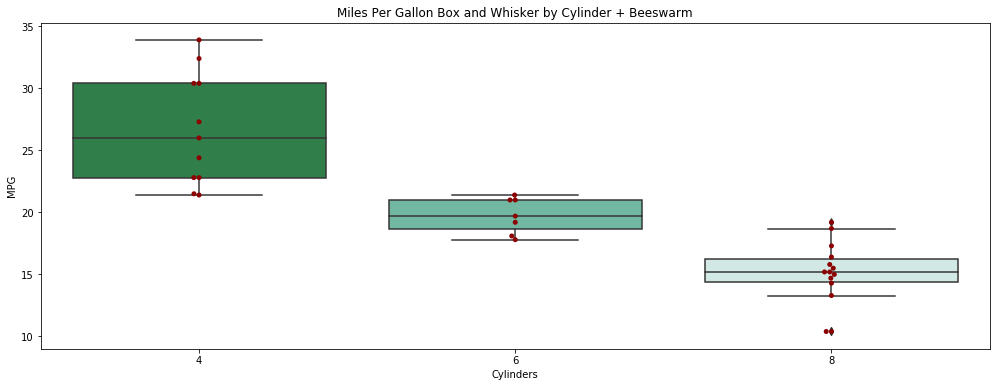

In [60]:
plt.figure(figsize=(17, 6)) # set print size
sns.boxplot(x="cyl", y="mpg", data=df, palette="BuGn_r")
sns.swarmplot(x="cyl", y="mpg", data=df, color="darkred")
plt.title("Miles Per Gallon Box and Whisker by Cylinder + Beeswarm")
plt.xlabel("Cylinders")
plt.ylabel("MPG")
plt.show()

### Regression Scatter Plot

Scatter can let us get an understanding of 2 continuous variables' relationship, possibly even gaining an understanding for the relationship between the two variables with a linear regression model.

Below, we can really see how the layering becomes powerful. We can see that the lighter a car is, the better the gas milage. Also note that we can annotate on top of graphs, thus letting us include important statistics or comments algorithmically in a visual

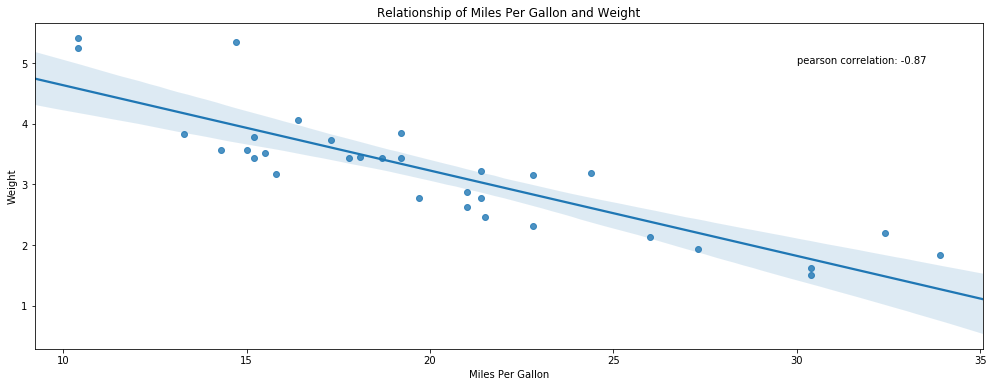

In [82]:
plt.figure(figsize=(17, 6)) # set print size
sns.regplot(x="mpg", y="wt", data=df)
plt.title("Relationship of Miles Per Gallon and Weight")
plt.xlabel("Miles Per Gallon")
plt.ylabel("Weight")
plt.annotate(f"pearson correlation: {round(stats.pearsonr(df.mpg, df.wt)[0],2)}", xy = (30,5))
plt.show()

Taking the regression visualization one step further, lets perform a separate regression line of the relationship between weight and mpg for every cylinder type. 

Below we can see that 4 cylinders have overall better gas milage, but all cylinder types still have a negative correlation to weight. Interesting!

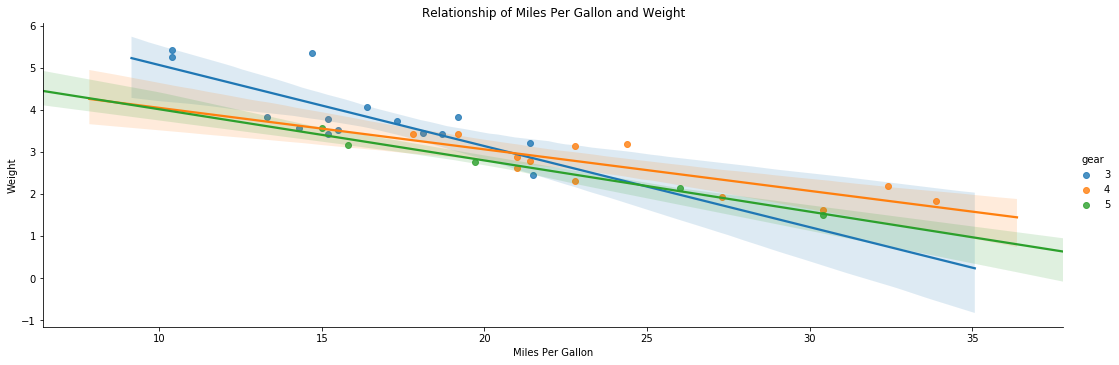

In [132]:
sns.lmplot(x="mpg", y="wt", hue="gear", data=df, height=5, aspect=3)
plt.title("Relationship of Miles Per Gallon and Weight")
plt.xlabel("Miles Per Gallon")
plt.ylabel("Weight")
plt.savefig("mpg_w_cyl.png")
plt.show()

### Bar

So, the plots thus far have been of varying complexity, but can we do simple stuff? Yes, and very fast.

Below we can see a boxplot of the average horse power by the the number of gears in the car. 

In [117]:
df_group = df.groupby('gear')['hp'].mean().reset_index(drop = False).sort_values(by = "hp", ascending = False)

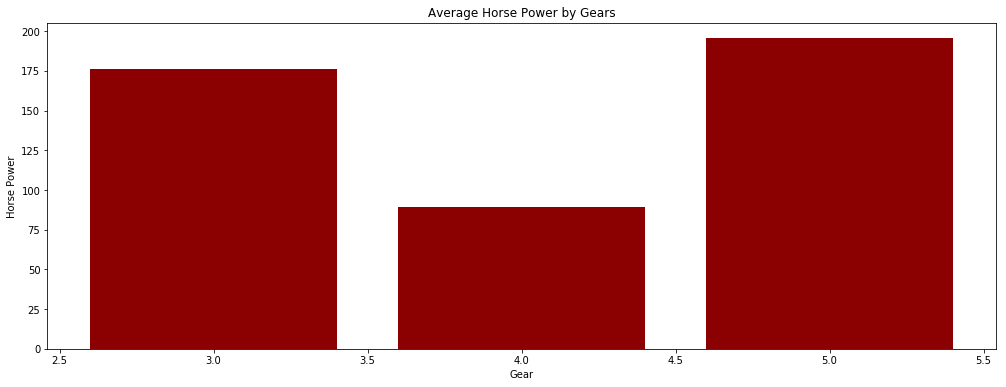

In [118]:
plt.figure(figsize=(17, 6)) # set print size
plt.bar(df_group['gear'], df_group['hp'], align='center', color = "darkred")
plt.title("Average Horse Power by Gears")
plt.xlabel("Gear")
plt.ylabel("Horse Power")
plt.show()

### Correlation Plot

So we've discussed relationships between variables, but what if I wanted to get a quick check on all the variable relationship at once. This is where we can use correlation and place in a seaborn matrix.

Below, we can see that mpg is negatively correlated to horse power, cylinders weight and displacement, however, positively correlated to gear, quarter mile time, transmission, engine and real axle ratio. The correlation plot really is a great tool for exploratory data analysis.

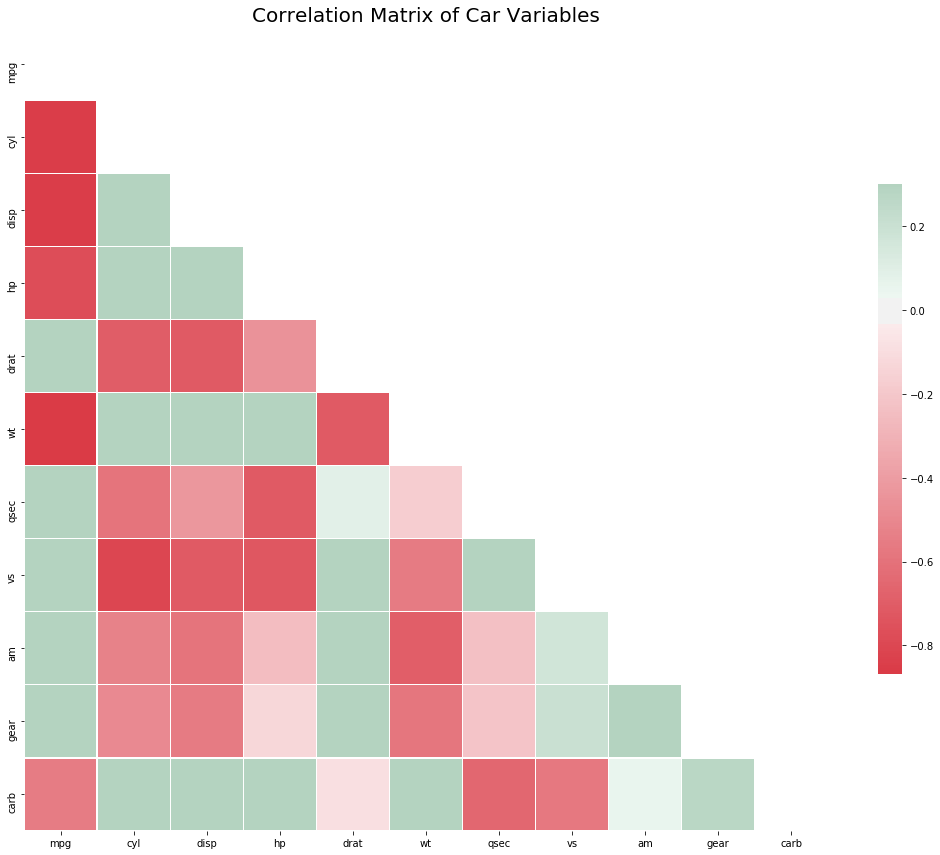

In [129]:
# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 18))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(10,500, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title("Correlation Matrix of Car Variables", fontsize = 20)
plt.show()